# ANALYSIS OF KENYAN PUBLIC DEBT AS A TIME SERIES


# IMPORTING REQUIRED LIBRARIES

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.api import SimpleExpSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pmdarima import auto_arima
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

 Importing the data in excel format

In [2]:
data=pd.read_excel(r'C:\Users\user\Desktop\Data science stuff\datta4.xlsx', index_col=0, parse_dates=True)

a sample of the imported data

In [3]:
data.head()

,Total
Year,
2001-01-01,596978.63
2001-02-01,602092.67
2001-03-01,603996.12
2001-04-01,612889.75
2001-05-01,610981.52


checking the data types of the data

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 245 entries, 2001-01-01 to 2021-06-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Total   245 non-null    float64
dtypes: float64(1)
memory usage: 3.8 KB


checking the statistical properties of the data

In [5]:
data.describe()

,Total
count,2.450000e+02
mean,2.313314e+06
std,2.016446e+06
min,5.969786e+05
25%,7.560812e+05
50%,1.388136e+06
75%,3.430959e+06
max,7.712393e+06


converting the data type of the Date column from object to time/date

the data time is time date since we will be dealing with a time series analysis package

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 245 entries, 2001-01-01 to 2021-06-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Total   245 non-null    float64
dtypes: float64(1)
memory usage: 3.8 KB


A plot of time against total public debt

Text(0.5, 1.0, 'A plot of total public debt againt time')

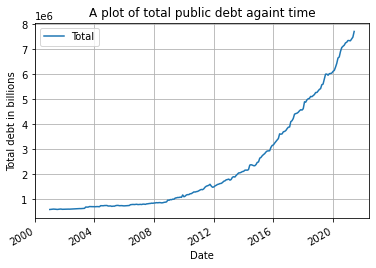

In [7]:
data.plot()
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Total debt in billions')
plt.title('A plot of total public debt againt time')


from the plot we can notice an increasing trend in the data over time

C:\Users\user\AppData\Local\Temp/ipykernel_4272/917377307.py:1: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  data.loc['2000-12-1':'2001-12-1'].plot()


<AxesSubplot:xlabel='Year'>

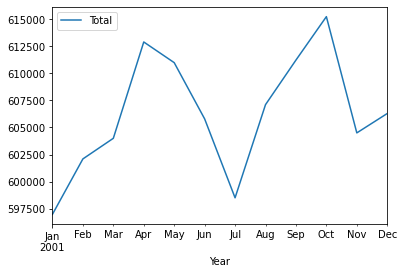

In [8]:
data.loc['2000-12-1':'2001-12-1'].plot()

In [9]:
%matplotlib notebook

<IPython.core.display.Javascript object>


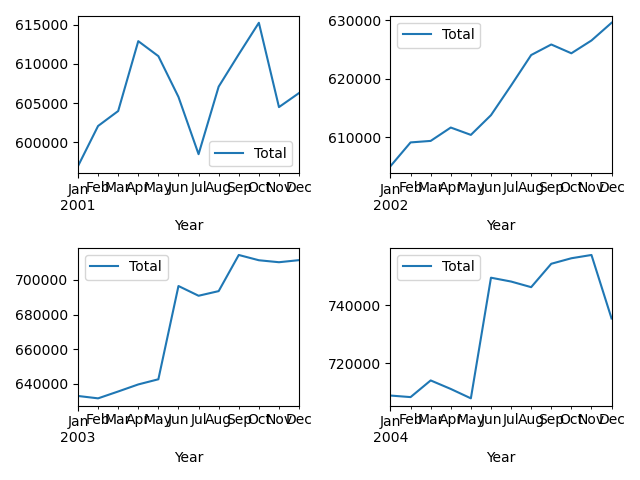

In [10]:
fig1 ,ax2=plt.subplots(2,2)

In [11]:

data.loc['2001-1-1':'2001-12-1'].plot(ax=ax2[0,0])
data.loc['2002-1-1':'2002-12-1'].plot(ax=ax2[0,1])
data.loc['2003-1-1':'2003-12-1'].plot(ax=ax2[1,0])
data.loc['2004-1-1':'2004-12-1'].plot(ax=ax2[1,1])
plt.tight_layout()

### logarithm of data values

<IPython.core.display.Javascript object>


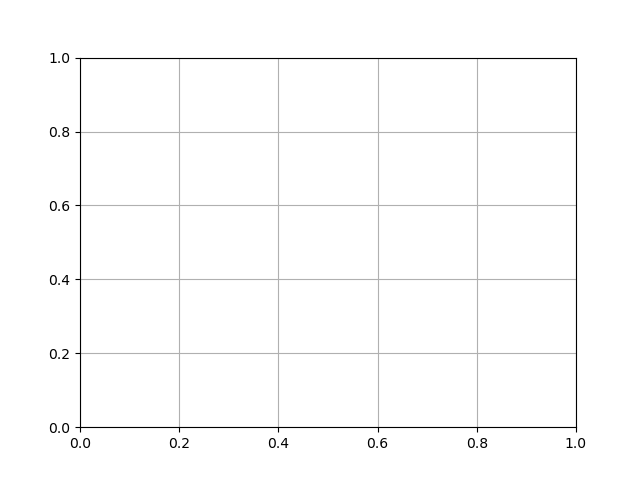

<IPython.core.display.Javascript object>


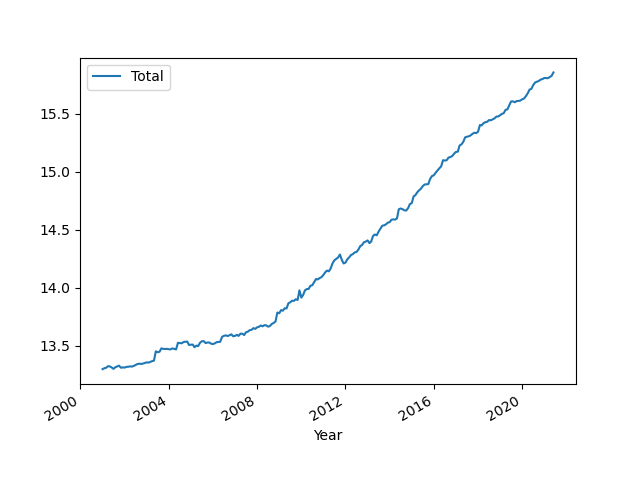

<AxesSubplot:xlabel='Year'>

In [12]:
data_log=np.log(data)
plt.figure()
fig2=plt.figure(2)
plt.grid(True)
data_log.plot()

In [13]:
data_log.head()

,Total
Year,
2001-01-01,13.299637
2001-02-01,13.308167
2001-03-01,13.311323
2001-04-01,13.325940
2001-05-01,13.322822


a decomposition of the time series data

C:\Users\user\AppData\Local\Temp/ipykernel_4272/3719993617.py:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decomposition=seasonal_decompose(data, freq=1,model='multiplicative')


<IPython.core.display.Javascript object>


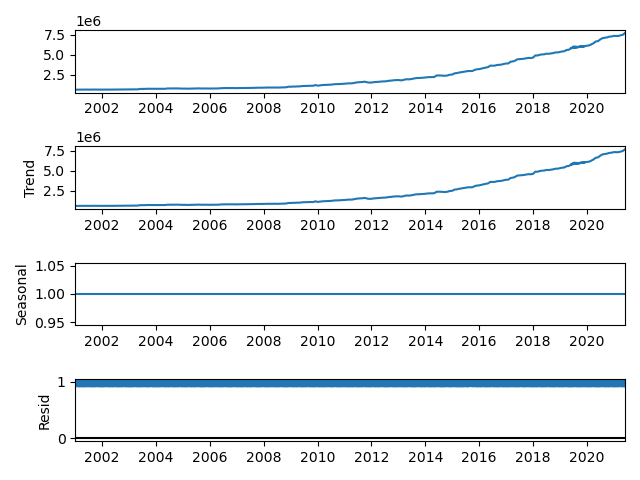

In [14]:
decomposition=seasonal_decompose(data, freq=1,model='multiplicative')
decomposition.plot();


a decomposition of the logarithm of the data

<IPython.core.display.Javascript object>


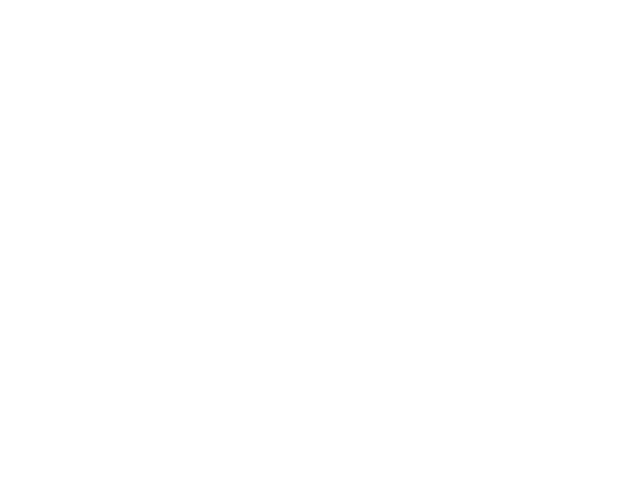

<IPython.core.display.Javascript object>


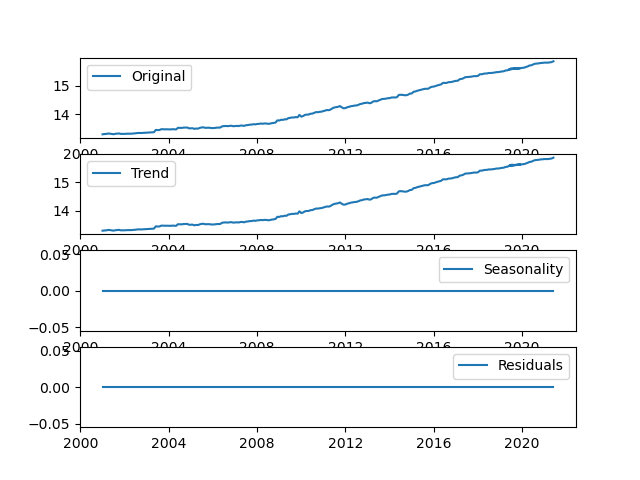

In [15]:
decomposition2=seasonal_decompose(data_log, period=1,model='additive')
trend=decomposition2.trend
seasonal=decomposition2.seasonal
residual=decomposition2.resid

plt.figure()
fig4=plt.figure(8)

plt.subplot(411)
plt.plot(data_log,label='Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend,label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual,label='Residuals')
plt.legend(loc='best')

# Measuring trend using exponential smoothing

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has

<IPython.core.display.Javascript object>


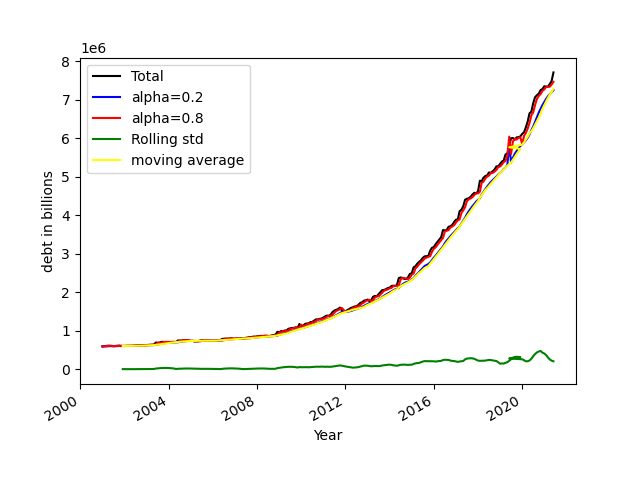

In [16]:
#when alpha is 0.2
ins1 = SimpleExpSmoothing(data).fit(smoothing_level=0.2,optimized=True)

#when alpha is 0.8
ins2 = SimpleExpSmoothing(data).fit(smoothing_level=0.8,optimized=True)



# visualize the plot
ax = data.plot( color='black', legend=True)

#plot for alpha =0.2

ins1.fittedvalues.plot( ax=ax, color='blue', label='alpha=0.2')

#pplot for alpha = 0.8

ins2.fittedvalues.plot(ax=ax, color='red', label='alpha=0.8')
plt.ylabel('debt in billions')

rolstd = data.rolling(window = 12).std()

std = plt.plot(rolstd,color='green',label='Rolling std')

plt.show()

# measuring trend using Moving average (rolling mean)

In [17]:
rolmean=data.rolling(window=12).mean()
print(rolmean)

                   Total
Year                    
2001-01-01           NaN
2001-02-01           NaN
2001-03-01           NaN
2001-04-01           NaN
2001-05-01           NaN
...                  ...
2021-02-01  6.963514e+06
2021-03-01  7.051587e+06
2021-04-01  7.132779e+06
2021-05-01  7.202474e+06
2021-06-01  7.287320e+06

[245 rows x 1 columns]


In [18]:

rollmean=plt.plot(rolmean,color='yellow',label='moving average')
plt.legend(loc='best')
plt.show(block=False)

# plot of ACF and PACF

<IPython.core.display.Javascript object>


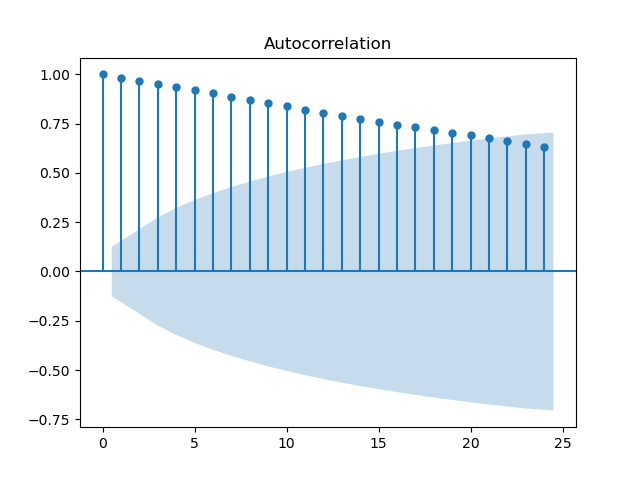

In [19]:
fig10=plot_acf(data)

<IPython.core.display.Javascript object>


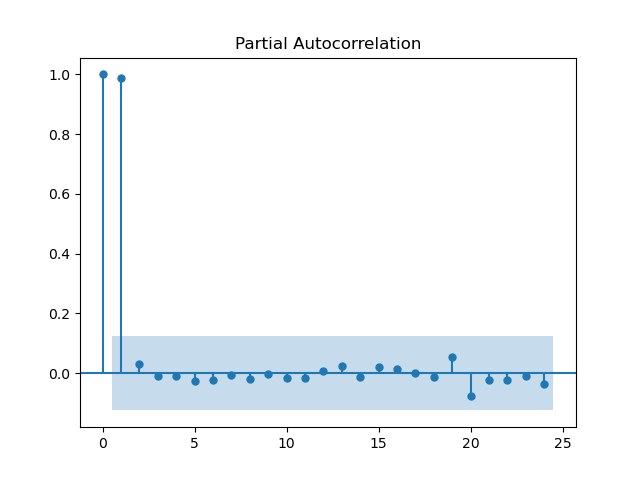

<IPython.core.display.Javascript object>


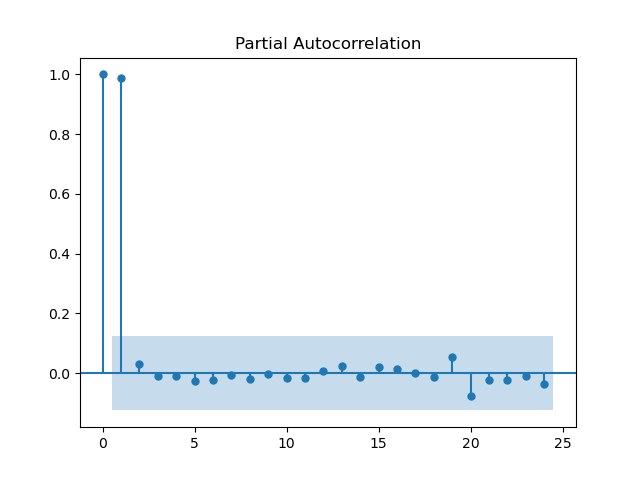

In [20]:
plot_pacf(data)

# modelling

In [21]:
print("Results of Dickey-Fuller test:")
dftest = adfuller(data_log['Total'],autolag='AIC')

dfoutput=pd.Series(dftest[0:4], index=['Test Statistics','p-value','#lags used','Number of Observation Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value(%s)'%key]= value
    
print(dfoutput)

Results of Dickey-Fuller test:
Test Statistics                 3.207761
p-value                         1.000000
#lags used                      1.000000
Number of Observation Used    243.000000
Critical Value(1%)             -3.457551
Critical Value(5%)             -2.873509
Critical Value(10%)            -2.573148
dtype: float64


In [22]:
auto_arima(data_log, seasonal=True, n=12).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  245
Model:               SARIMAX(0, 2, 2)   Log Likelihood                 626.895
Date:                Mon, 06 Jun 2022   AIC                          -1247.789
Time:                        10:40:11   BIC                          -1237.310
Sample:                             0   HQIC                         -1243.568
                                - 245                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.1378      0.053    -21.436      0.000      -1.242      -1.034
ma.L2          0.1705      0.053      3.208      0.001       0.066       0.275
sigma2         0.0003    1.7e-05     19.574      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               212.13
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               1.29   Skew:                             0.81
Prob(H) (two-sided):                  0.26   Kurtosis:                         7.28
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<IPython.core.display.Javascript object>


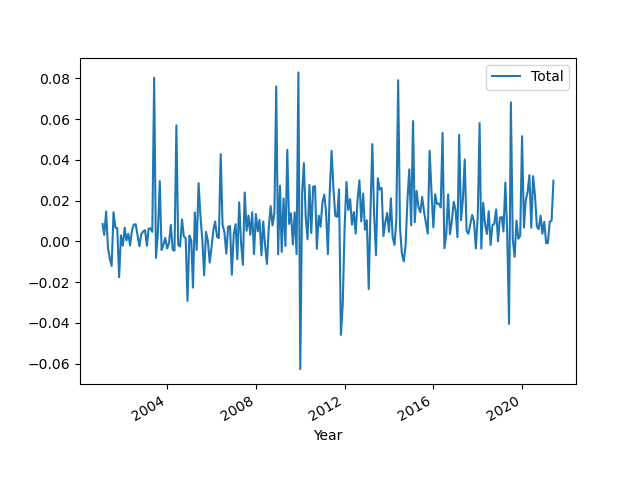

In [23]:
fig12, ax10=plt.subplots()

In [24]:
from matplotlib import pyplot
diff = data_log.diff()
diff.plot(ax=ax10)

<AxesSubplot:xlabel='Year'>

In [25]:
diff.head(10)

,Total
Year,
2001-01-01,NaN
2001-02-01,0.008530
2001-03-01,0.003156
2001-04-01,0.014617
2001-05-01,-0.003118
2001-06-01,-0.008532
2001-07-01,-0.012102
2001-08-01,0.014266
2001-09-01,0.006755


In [26]:
diffdata=diff.dropna()

In [27]:
diffdata.head(10)

,Total
Year,
2001-02-01,0.008530
2001-03-01,0.003156
2001-04-01,0.014617
2001-05-01,-0.003118
2001-06-01,-0.008532
2001-07-01,-0.012102
2001-08-01,0.014266
2001-09-01,0.006755
2001-10-01,0.006540


In [28]:
print("Results of Dickey-Fuller test:")
dfdatatest = adfuller(diffdata['Total'],autolag='AIC')

dfdataoutput=pd.Series(dfdatatest[0:4], index=['Test Statistics','p-value','#lags used','Number of Observation Used'])
for key,value in dfdatatest[4].items():
    dfdataoutput['Critical Value(%s)'%key]= value
    
print(dfdataoutput)

Results of Dickey-Fuller test:
Test Statistics              -1.721112e+01
p-value                       6.367879e-30
#lags used                    0.000000e+00
Number of Observation Used    2.430000e+02
Critical Value(1%)           -3.457551e+00
Critical Value(5%)           -2.873509e+00
Critical Value(10%)          -2.573148e+00
dtype: float64


<IPython.core.display.Javascript object>


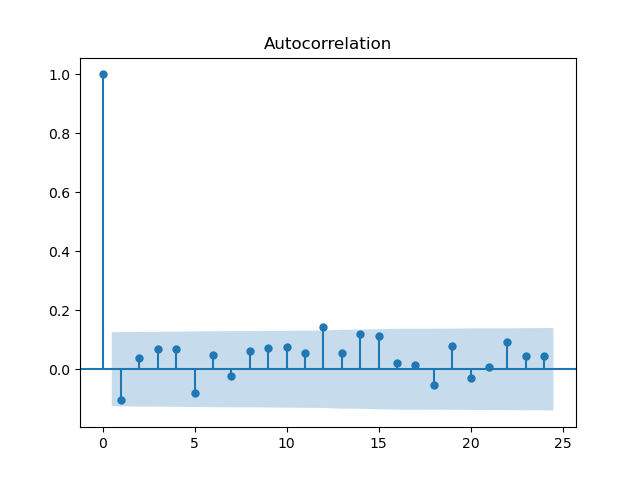

<IPython.core.display.Javascript object>


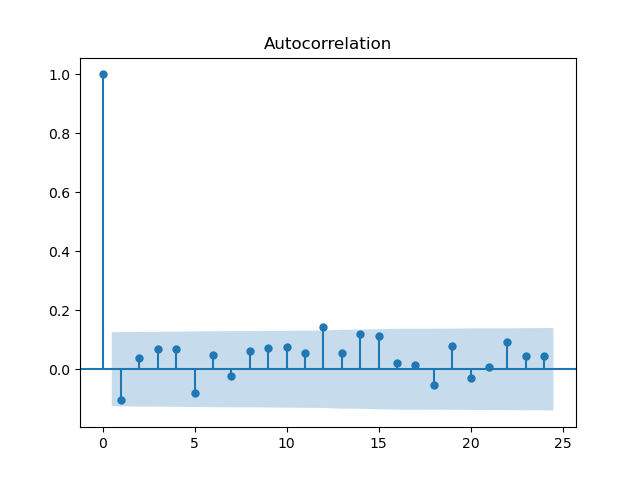

In [29]:
plot_acf(diffdata)

<IPython.core.display.Javascript object>


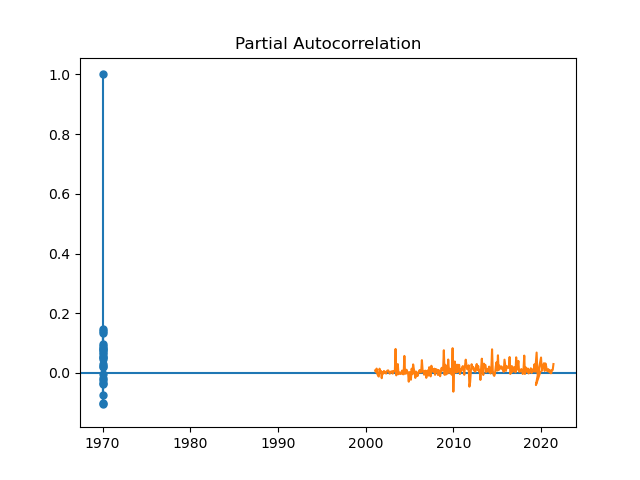

<IPython.core.display.Javascript object>


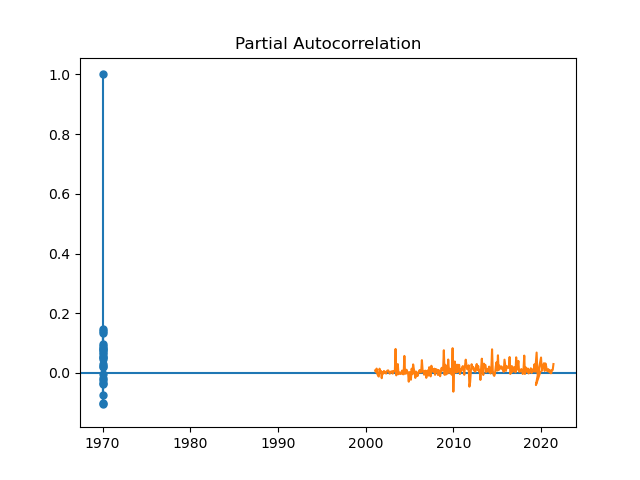

In [30]:
plot_pacf(diffdata)

In [31]:
diffdata2=diffdata.diff()

In [32]:
diffdata2.head(10)

,Total
Year,
2001-02-01,NaN
2001-03-01,-0.005374
2001-04-01,0.011461
2001-05-01,-0.017736
2001-06-01,-0.005414
2001-07-01,-0.003570
2001-08-01,0.026368
2001-09-01,-0.007511
2001-10-01,-0.000215


In [33]:
diffdata21=diffdata2.dropna()

In [34]:
#fig13, ax11=plt.subplots()

In [35]:
#diffdata21.plot(ax=ax11)

In [36]:
#plot_acf(diffdata21)

In [37]:
#plot_pacf(diffdata21)

In [38]:
print("Results of Dickey-Fuller test:")
dfdata21test = adfuller(diffdata21['Total'],autolag='AIC')

dfdata21output=pd.Series(dfdata21test[0:4], index=['Test Statistics','p-value','#lags used','Number of Observation Used'])
for key,value in dfdatatest[4].items():
    dfdata21output['Critical Value(%s)'%key]= value
    
print(dfdata21output)

Results of Dickey-Fuller test:
Test Statistics              -8.987689e+00
p-value                       7.028231e-15
#lags used                    1.300000e+01
Number of Observation Used    2.290000e+02
Critical Value(1%)           -3.457551e+00
Critical Value(5%)           -2.873509e+00
Critical Value(10%)          -2.573148e+00
dtype: float64


In [39]:
#diffdata21.info()

In [40]:
#diffdata21.describe()

In [41]:
#data2=diffdata21

In [42]:
#shifting the data into a time series to be used in forecasting
dataLogDiffShifting = data_log - data_log.shift()
print(dataLogDiffShifting.head())
plt.plot(dataLogDiffShifting)

               Total
Year                
2001-01-01       NaN
2001-02-01  0.008530
2001-03-01  0.003156
2001-04-01  0.014617
2001-05-01 -0.003118


<IPython.core.display.Javascript object>


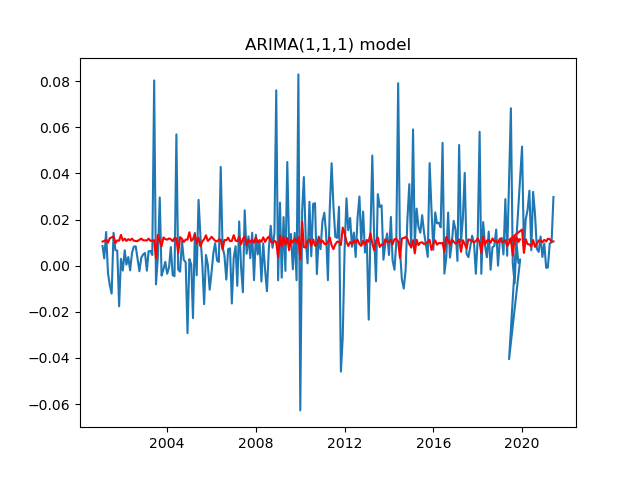

In [43]:
fig12, ax17=plt.subplots()

In [44]:
#fitting the ARIMA(1,1,1) model

model = ARIMA(data_log, order = (1, 1, 1))
results_AR = model.fit(disp = -1)

plt.plot(dataLogDiffShifting)
plt.plot(results_AR.fittedvalues, color= 'red')
plt.title('ARIMA(1,1,1) model')#'RSS: %.4f' % sum((results_AR.fittedvalues-dataLogDiffShifting['Total'])**2))
plt.show()
print('Plotting ARIMA(1,1,1) model')


C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency i

Plotting ARIMA(1,1,1) model


In [45]:
dataLogDiffShifting.head()

,Total
Year,
2001-01-01,NaN
2001-02-01,0.008530
2001-03-01,0.003156
2001-04-01,0.014617
2001-05-01,-0.003118


In [46]:
daff=dataLogDiffShifting.dropna()

In [47]:
bestfit=auto_arima(daff,trace=True)
bestfit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1240.940, Time=0.65 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1048.385, Time=0.16 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1139.287, Time=0.15 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.55 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1050.383, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.86 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1245.458, Time=0.99 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1247.195, Time=0.59 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-1247.392, Time=0.50 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-1232.978, Time=0.31 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-1243.794, Time=0.87 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-1247.789, Time=0.32 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-1242.915, Time=0.16 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-1242.779, Time=0.38 sec
 ARIMA(0,1,3)(0,0,0)[0]        

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  244
Model:               SARIMAX(0, 1, 2)   Log Likelihood                 626.895
Date:                Mon, 06 Jun 2022   AIC                          -1247.789
Time:                        10:42:43   BIC                          -1237.310
Sample:                             0   HQIC                         -1243.568
                                - 244                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.1375      0.053    -21.428      0.000      -1.242      -1.033
ma.L2          0.1704      0.053      3.205      0.001       0.066       0.275
sigma2         0.0003    1.7e-05     19.565      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               212.20
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               1.29   Skew:                             0.81
Prob(H) (two-sided):                  0.26   Kurtosis:                         7.28
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [48]:
auto_arima(daff, seasonal=True, n=12).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  244
Model:               SARIMAX(0, 1, 2)   Log Likelihood                 626.895
Date:                Mon, 06 Jun 2022   AIC                          -1247.789
Time:                        10:42:51   BIC                          -1237.310
Sample:                             0   HQIC                         -1243.568
                                - 244                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.1375      0.053    -21.428      0.000      -1.242      -1.033
ma.L2          0.1704      0.053      3.205      0.001       0.066       0.275
sigma2         0.0003    1.7e-05     19.565      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               212.20
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               1.29   Skew:                             0.81
Prob(H) (two-sided):                  0.26   Kurtosis:                         7.28
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<IPython.core.display.Javascript object>


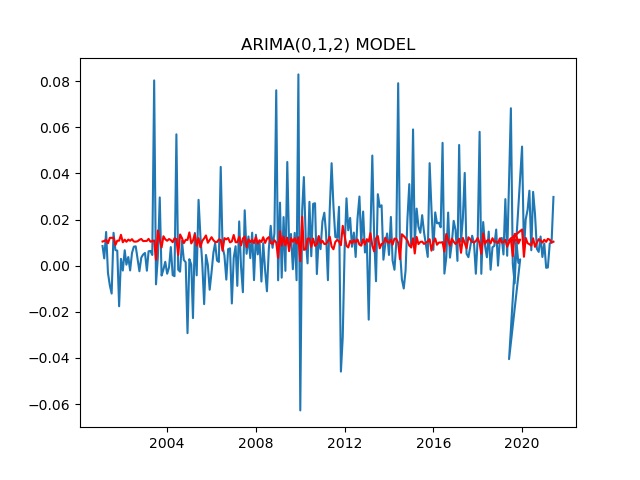

In [49]:
fig12, ax18=plt.subplots()

In [50]:
#ARIMA(0,1,2) MODEL 
model = ARIMA(data_log, order = (0, 1, 2))
results_MA = model.fit(disp = -1)

plt.plot(dataLogDiffShifting)
plt.plot(results_MA.fittedvalues, color= 'red')
plt.title('ARIMA(0,1,2) MODEL')#'RSS: %.4f' % sum((results_AR.fittedvalues-dataLogDiffShifting['Total'])**2))
print('Plotting MA model')



C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency i

Plotting MA model


<IPython.core.display.Javascript object>


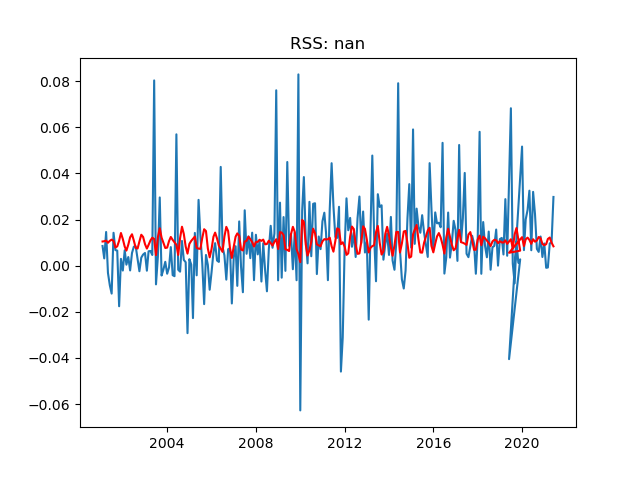

In [51]:
fig12, ax19=plt.subplots()

In [52]:
model = ARIMA(data_log,order = (2,1,2))
results_ARIMA = model.fit(disp= -1)
plt.plot(dataLogDiffShifting)
plt.plot(results_ARIMA.fittedvalues,color = 'red')
plt.title('RSS: %.4f' % sum((results_ARIMA.fittedvalues-dataLogDiffShifting['Total'])**2))
#PREDICTION 
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignor

Year
2001-02-01    0.010495
2001-03-01    0.010607
2001-04-01    0.010863
2001-05-01    0.009934
2001-06-01    0.010791
dtype: float64


In [53]:
#convert to cumulative sum
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

Year
2001-02-01    0.010495
2001-03-01    0.021102
2001-04-01    0.031965
2001-05-01    0.041899
2001-06-01    0.052690
dtype: float64


In [54]:
#prediction for fitted values
predictions_ARIMA_log = pd.Series(data_log['Total'], index=data_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
print(predictions_ARIMA_log.head())

Year
2001-01-01    13.299637
2001-02-01    13.318662
2001-03-01    13.332425
2001-04-01    13.357906
2001-05-01    13.364721
dtype: float64


<IPython.core.display.Javascript object>


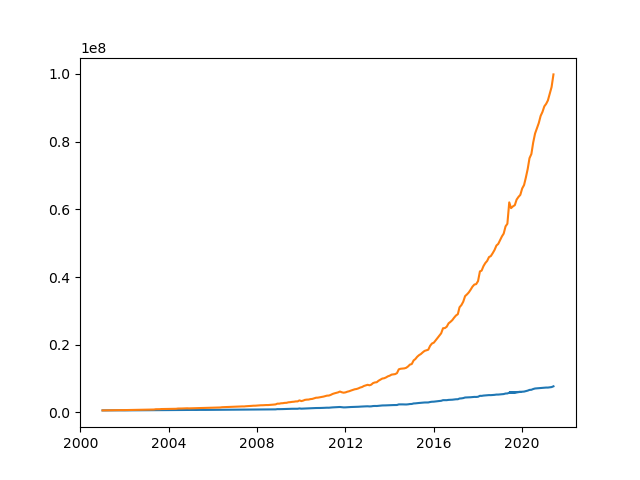

In [55]:
fig12, ax20=plt.subplots()

In [56]:
#finding the exponent of the data
predictions_ARIMA =np.exp(predictions_ARIMA_log)
plt.plot(data)
plt.plot(predictions_ARIMA)

In [57]:
predictions_ARIMA.head()

Year
2001-01-01    596978.630000
2001-02-01    608444.922062
2001-03-01    616877.200775
2001-04-01    632797.353575
2001-05-01    637125.049728
dtype: float64

                Total
Year                 
2001-01-01  13.299637
2001-02-01  13.308167
2001-03-01  13.311323
2001-04-01  13.325940
2001-05-01  13.322822
...               ...
2021-02-01  15.809595
2021-03-01  15.808810
2021-04-01  15.818482
2021-05-01  15.828533
2021-06-01  15.858339

[245 rows x 1 columns]


<IPython.core.display.Javascript object>


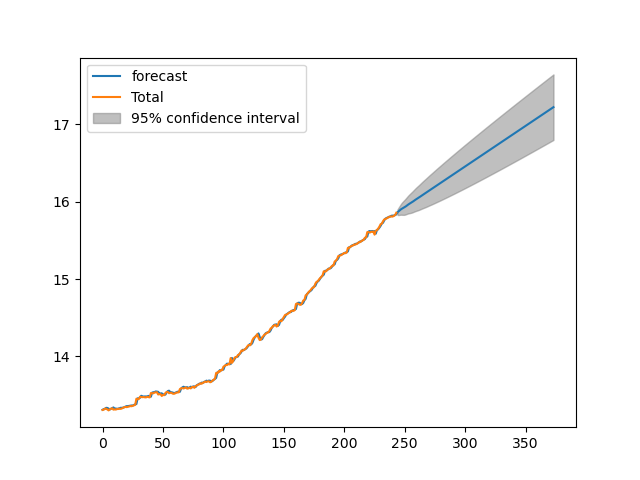

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


<IPython.core.display.Javascript object>


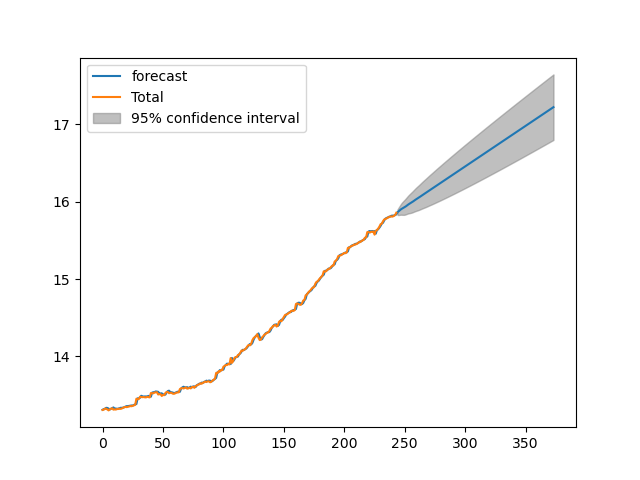

In [58]:
#view the daata
print(data_log)

results_ARIMA.plot_predict(1,374)



In [59]:
x = results_ARIMA.forecast(steps=120)
print(x)

(array([15.86590341, 15.87779609, 15.89188877, 15.90437072, 15.91366437,
       15.92149987, 15.9306629 , 15.94216481, 15.95461771, 15.96599369,
       15.97566095, 15.98472057, 15.99464258, 16.00580773, 16.01735078,
       16.02821068, 16.03816998, 16.04790299, 16.05817216, 16.06909096,
       16.08013768, 16.09076702, 16.10092987, 16.1110272 , 16.12144712,
       16.13220044, 16.14298086, 16.15351356, 16.16380914, 16.17410033,
       16.18458061, 16.19522865, 16.20586853, 16.21636486, 16.22674318,
       16.2371358 , 16.24763685, 16.2582204 , 16.2687874 , 16.2792729 ,
       16.28970111, 16.30014586, 16.31065158, 16.3211968 , 16.3317267 ,
       16.34221117, 16.35266867, 16.36313969, 16.37364439, 16.38416735,
       16.39467876, 16.40516528, 16.41563959, 16.42612355, 16.43662582,
       16.44713613, 16.45763853, 16.46812754, 16.47861132, 16.48910149,
       16.49960143, 16.51010468, 16.52060285, 16.5310939 , 16.54158293,
       16.55207597, 16.56257416, 16.57307353, 16.58356977, 16.5

In [60]:
dx7=([[15.82995634, 15.90185048],
       [15.82873297, 15.92685921],
       [15.83167097, 15.95210657],
       [15.83299693, 15.97574451],
       [15.83183177, 15.99549697],
       [15.83095562, 16.01204412],
       [15.83313275, 16.02819304],
       [15.83850671, 16.04582291],
       [15.84483231, 16.0644031 ],
       [15.84981766, 16.08216971],
       [15.85319616, 16.09812575],
       [15.85652898, 16.11291216],
       [15.86134325, 16.1279419 ],
       [15.86771319, 16.14390227],
       [15.8744482 , 16.16025337],
       [15.88041063, 16.17601074],
       [15.88555702, 16.19078293],
       [15.89075394, 16.20505205],
       [15.89677676, 16.21956756],
       [15.90359678, 16.23458514],
       [15.91055191, 16.24972346],
       [15.9170767 , 16.26445734],
       [15.92320905, 16.27865069],
       [15.92943321, 16.29262118],
       [15.9361341 , 16.30676013],
       [15.94325128, 16.32114961],
       [15.95041531, 16.33554641],
       [15.95734865, 16.34967847],
       [15.96410601, 16.36351228],
       [15.97095645, 16.37724422],
       [15.97808668, 16.39107454],
       [15.9854386 , 16.40501869],
       [15.99280741, 16.41892964],
       [16.00005952, 16.43267021],
       [16.00724276, 16.4462436 ],
       [16.01450507, 16.45976653],
       [16.02193441, 16.47333928],
       [16.0294856 , 16.4869552 ],
       [16.03704623, 16.50052857],
       [16.04455363, 16.51399218],
       [16.05204314, 16.52735908],
       [16.05959502, 16.5406967 ],
       [16.06724909, 16.55405408],
       [16.07497367, 16.56741992],
       [16.08270772, 16.58074567],
       [16.09042284, 16.59399951],
       [16.09814289, 16.60719445],
       [16.10591076, 16.62036861],
       [16.11374345, 16.63354534],
       [16.12162005, 16.64671465],
       [16.1295078 , 16.65984972],
       [16.13739439, 16.67293617],
       [16.14529504, 16.68598415],
       [16.15323227, 16.69901484],
       [16.16121264, 16.71203899],
       [16.16922291, 16.72504934],
       [16.17724567, 16.7380314 ],
       [16.18527593, 16.75097914],
       [16.19332298, 16.76389966],
       [16.20139841, 16.77680456],
       [16.20950425, 16.78969862],
       [16.21763234, 16.80257703],
       [16.2257735 , 16.81543219],
       [16.23392594, 16.82826187],
       [16.2420951 , 16.84107076],
       [16.2502868 , 16.85386514],
       [16.25850125, 16.86664706],
       [16.26673354, 16.87941353],
       [16.27497885, 16.89216069],
       [16.28323665, 16.90488796],
       [16.29151003, 16.91759832],
       [16.29980182, 16.93029517],
       [16.3081116 , 16.94297933],
       [16.31643644, 16.95564907],
       [16.32477382, 16.9683025 ],
       [16.33312367, 16.98093968],
       [16.34148766, 16.99356249],
       [16.34986708, 17.00617276],
       [16.3582614 , 17.01877081],
       [16.36666888, 17.03135569],
       [16.3750882 , 17.04392654],
       [16.38351937, 17.05648364],
       [16.39196327, 17.06902814],
       [16.40042043, 17.08156104],
       [16.40889038, 17.0940825 ],
       [16.41737206, 17.10659203],
       [16.42586476, 17.11908928],
       [16.4343685 , 17.13157455],
       [16.44288371, 17.14404858],
       [16.45141054, 17.15651193],
       [16.45994861, 17.16896468],
       [16.46849729, 17.18140661],
       [16.47705616, 17.19383765],
       [16.48562523, 17.20625806],
       [16.49420465, 17.21866829],
       [16.50279442, 17.23106869],
       [16.51139426, 17.24345934],
       [16.52000376, 17.25584016],
       [16.52862267, 17.26821118],
       [16.53725095, 17.28057262],
       [16.54588864, 17.29292479],
       [16.55453568, 17.3052679 ],
       [16.56319183, 17.31760204],
       [16.57185684, 17.3299272 ],
       [16.58053052, 17.34224348],
       [16.58921284, 17.35455103],
       [16.59790376, 17.36685008],
       [16.60660318, 17.37914077],
       [16.61531094, 17.39142319],
       [16.62402685, 17.40369739],
       [16.63275078, 17.41596344],
       [16.64148267, 17.4282215 ],
       [16.65022247, 17.44047172],
       [16.65897006, 17.45271422],
       [16.66772533, 17.46494907],
       [16.67648813, 17.47717634],
       [16.68525836, 17.48939612],
       [16.69403596, 17.50160852],
       [16.70282085, 17.51381366],
       [16.71161294, 17.52601165]])

In [61]:
dx7=pd.DataFrame(dx7,columns=['lower limit 2','upper limit 2'])

In [62]:
dx8=np.exp(dx7)

In [63]:
dx8.head()

,lower limit 2,upper limit 2
0,7.496571e+06,8.055378e+06
1,7.487406e+06,8.259373e+06
2,7.509436e+06,8.470555e+06
3,7.519400e+06,8.673167e+06
4,7.510644e+06,8.846186e+06


<IPython.core.display.Javascript object>


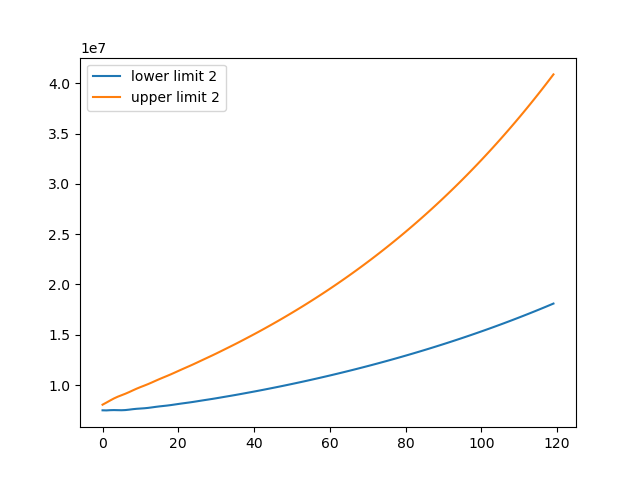

<AxesSubplot:>

In [64]:
dx8.plot()

In [65]:
dx8.to_csv(r'C:\Users\user\Desktop\john.csv')

In [66]:
data.tail()

,Total
Year,
2021-02-01,7345471.70
2021-03-01,7339707.31
2021-04-01,7411046.24
2021-05-01,7485910.53
2021-06-01,7712392.57


In [67]:
predictions2=pd.read_csv(r'C:\Users\user\Desktop\Data science stuff\predictions2.csv', index_col=0, parse_dates=True)

<IPython.core.display.Javascript object>


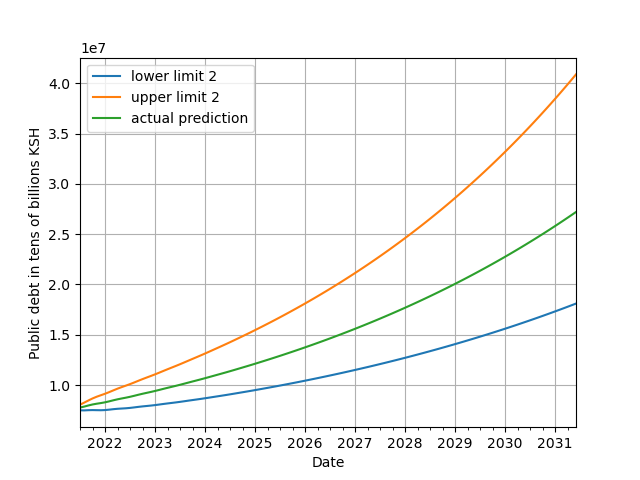

Text(0, 0.5, 'Public debt in tens of billions KSH')

In [68]:
predictions2.plot()
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Public debt in tens of billions KSH')

In [69]:
ty=([15.86590341, 15.87779609, 15.89188877, 15.90437072, 15.91366437,
       15.92149987, 15.9306629 , 15.94216481, 15.95461771, 15.96599369,
       15.97566095, 15.98472057, 15.99464258, 16.00580773, 16.01735078,
       16.02821068, 16.03816998, 16.04790299, 16.05817216, 16.06909096,
       16.08013768, 16.09076702, 16.10092987, 16.1110272 , 16.12144712,
       16.13220044, 16.14298086, 16.15351356, 16.16380914, 16.17410033,
       16.18458061, 16.19522865, 16.20586853, 16.21636486, 16.22674318,
       16.2371358 , 16.24763685, 16.2582204 , 16.2687874 , 16.2792729 ,
       16.28970111, 16.30014586, 16.31065158, 16.3211968 , 16.3317267 ,
       16.34221117, 16.35266867, 16.36313969, 16.37364439, 16.38416735,
       16.39467876, 16.40516528, 16.41563959, 16.42612355, 16.43662582,
       16.44713613, 16.45763853, 16.46812754, 16.47861132, 16.48910149,
       16.49960143, 16.51010468, 16.52060285, 16.5310939 , 16.54158293,
       16.55207597, 16.56257416, 16.57307353, 16.58356977, 16.5940623 ,
       16.60455418, 16.61504849, 16.62554546, 16.63604275, 16.64653816,
       16.65703167, 16.66752508, 16.67801992, 16.6885161 , 16.69901229,
       16.70950737, 16.7200015 , 16.7304957 , 16.74099074, 16.75148644,
       16.76198204, 16.77247702, 16.78297153, 16.79346615, 16.80396124,
       16.81445665, 16.82495195, 16.83544691, 16.84594164, 16.85643647,
       16.86693156, 16.8774268 , 16.88792196, 16.89841692, 16.90891178,
       16.91940672, 16.92990179, 16.94039693, 16.95089202, 16.961387  ,
       16.97188194, 16.98237692, 16.99287198, 17.00336707, 17.01386212,
       17.02435711, 17.03485209, 17.04534709, 17.05584214, 17.0663372 ,
       17.07683223, 17.08732724, 17.09782224, 17.10831726, 17.11881229])

In [70]:
ty=pd.DataFrame(ty,columns=['actual prediction'])

In [71]:
ty2=np.exp(ty)

In [72]:
ty2.to_csv(r'C:\Users\user\Desktop\john2.csv')

<IPython.core.display.Javascript object>


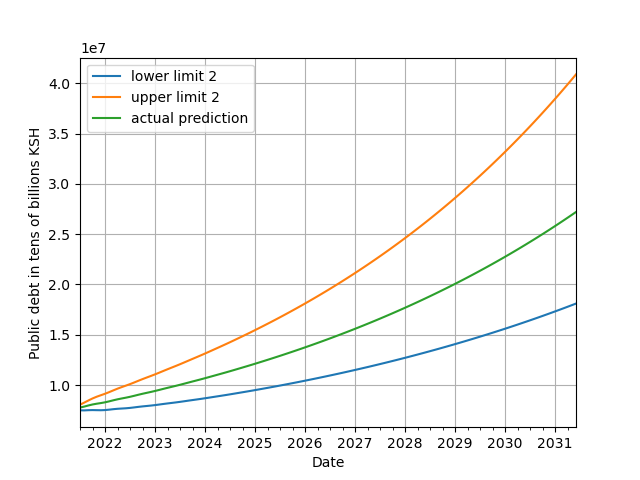

Text(0, 0.5, 'Public debt in tens of billions KSH')

In [73]:
predictions2.plot()
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Public debt in tens of billions KSH')

In [74]:
data_log['Total'].mean()

14.30625278869465

In [75]:
#rmse=sqrt(mean_squared_error(results_MA.fittedvalues,dataLogDiffShifting))

In [76]:
results_MA.fittedvalues.head()

Year
2001-02-01    0.010481
2001-03-01    0.010703
2001-04-01    0.011208
2001-05-01    0.009717
2001-06-01    0.012067
dtype: float64

In [79]:
new=dataLogDiffShifting.dropna()

In [80]:
rmse=sqrt(mean_squared_error(results_MA.fittedvalues,new))
print(rmse)

0.018533771040949994
